In [1]:
import os
if os.path.exists("Data"):
    print("Yes")

Yes


In [2]:
if os.path.exists("Data/test.txt"):
    print("Yes")
else:
    print("No")

No


In [3]:
import requests
url = 'https://archive.ics.uci.edu/static/public/352/online+retail.zip'


# response = requests.get(url)
# file_Path = 'Data/online_retail_data.zip'

# if response.status_code == 200:
#     with open(file_Path, 'wb') as file:
#         file.write(response.content)
#     print('File downloaded successfully')
# else:
#     print('Failed to download file')

In [4]:
import zipfile

In [5]:
# with zipfile.ZipFile("./Data/online_retail_data.zip", "r") as zip_ref:
#     zip_ref.extractall("./Data")

In [6]:
os.path.exists("./Data/Online Retail.xlsx")

True

# Data Analysis

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel("./Data/Online Retail.xlsx")

In [298]:
df.shape

(541909, 8)

In [299]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [300]:
df_excel = pd.ExcelFile("./Data/Online Retail.xlsx")
df_excel.sheet_names

['Online Retail']

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [302]:
df[df['InvoiceNo'].astype(str).str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [303]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [304]:
df["InvoiceDate"].std()

Timedelta('115 days 21:05:07.004935280')

In [305]:
df["CustomerID"].isnull().sum()

np.int64(135080)

In [306]:
#remove null CustomerID
df_clean = df.dropna(subset=["CustomerID"])

In [307]:
df_clean.shape

(406829, 8)

In [308]:
df_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [309]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,406829.0,22190.0,576339.0,542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,406829,3684,85123A,2077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,406829,3896,WHITE HANGING HEART T-LIGHT HOLDER,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,406829.0,NaN,NaN,NaN,12.061303,-80995.0,2.0,5.0,12.0,80995.0,248.69337
InvoiceDate,406829,NaN,NaN,NaN,2011-07-10 16:30:57.879207424,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-31 11:48:00,2011-10-20 13:06:00,2011-12-09 12:50:00,NaN
UnitPrice,406829.0,NaN,NaN,NaN,3.460471,0.0,1.25,1.95,3.75,38970.0,69.315162
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,406829,37,United Kingdom,361878,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [311]:
unique_country = df_clean["Country"].unique()
print(unique_country)
print(len(unique_country))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
37


In [312]:
df_clean[df_clean['InvoiceNo'].astype(str).str.startswith('C')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [313]:
#removing the cancel orders
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
df_clean.shape

(397924, 8)

In [314]:
df_clean[df_clean["Quantity"] <= 0].shape

(0, 8)

In [315]:
df_clean[df_clean["UnitPrice"] <= 0].shape

(40, 8)

In [316]:
#removing the negative or zero unitPrice
df_clean = df_clean[df_clean["UnitPrice"] > 0]

In [317]:
df_clean.shape

(397884, 8)

In [318]:
df_clean["UnitPrice"].apply(lambda x:x*1.34).head()

0    3.4170
1    4.5426
2    3.6850
3    4.5426
4    4.5426
Name: UnitPrice, dtype: float64

In [319]:
df_clean["UnitPrice"].head()

0    2.55
1    3.39
2    2.75
3    3.39
4    3.39
Name: UnitPrice, dtype: float64

In [320]:
#adding column where price is in the dollar 
df_clean["UnitPriceDollar"] = df_clean["UnitPrice"].apply(lambda x:x*1.34)

In [321]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        397884 non-null  object        
 1   StockCode        397884 non-null  object        
 2   Description      397884 non-null  object        
 3   Quantity         397884 non-null  int64         
 4   InvoiceDate      397884 non-null  datetime64[ns]
 5   UnitPrice        397884 non-null  float64       
 6   CustomerID       397884 non-null  float64       
 7   Country          397884 non-null  object        
 8   UnitPriceDollar  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [322]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397884.0,12.988238,1.0,2.0,6.0,12.0,80995.0,179.331775
InvoiceDate,397884,2011-07-10 23:41:23.511023360,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397884.0,3.116488,0.001,1.25,1.95,3.75,8142.75,22.097877
CustomerID,397884.0,15294.423453,12346.0,13969.0,15159.0,16795.0,18287.0,1713.14156
UnitPriceDollar,397884.0,4.176094,0.00134,1.675,2.613,5.025,10911.285,29.611155


In [323]:
#adding the Revenue column
df_clean["Revenue"] = df_clean['Quantity'] * df_clean['UnitPriceDollar']

In [324]:
df_clean.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPriceDollar,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.4170,20.5020
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.5426,27.2556
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,3.6850,29.4800


In [325]:
#adding the month and year columns 
df_clean["Month"] = df_clean["InvoiceDate"].dt.to_period('M').astype(str)
df_clean["Year"] = df_clean["InvoiceDate"].dt.to_period('Y').astype(str)
df_clean.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPriceDollar,Revenue,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.4170,20.5020,2010-12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.5426,27.2556,2010-12,2010


In [326]:
len(df_clean["InvoiceNo"].unique())

18532

In [327]:
df_clean.shape

(397884, 12)

In [328]:
len(df_clean["CustomerID"].unique())

4338

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [330]:
# 1. monthly revenue
# 2. yearly revenue
# 3. Top 10 Country by revenue
# 4. Top 10 Purchase
# 5. No. of Customer by Country (Top 10)
# 6. Quantity vs Revenue by Country
# 7. Top 10 Products by Quantity Sold
# 8. Correlation Heatmap


In [331]:
# 1. monthly by revenue
monthly_revenue = df_clean.groupby('Month')['Revenue'].sum().sort_index()
monthly_revenue.head()

Month
2010-12    767436.61260
2011-01    763056.35360
2011-02    599164.04900
2011-03    797971.01840
2011-04    628728.48374
Name: Revenue, dtype: float64

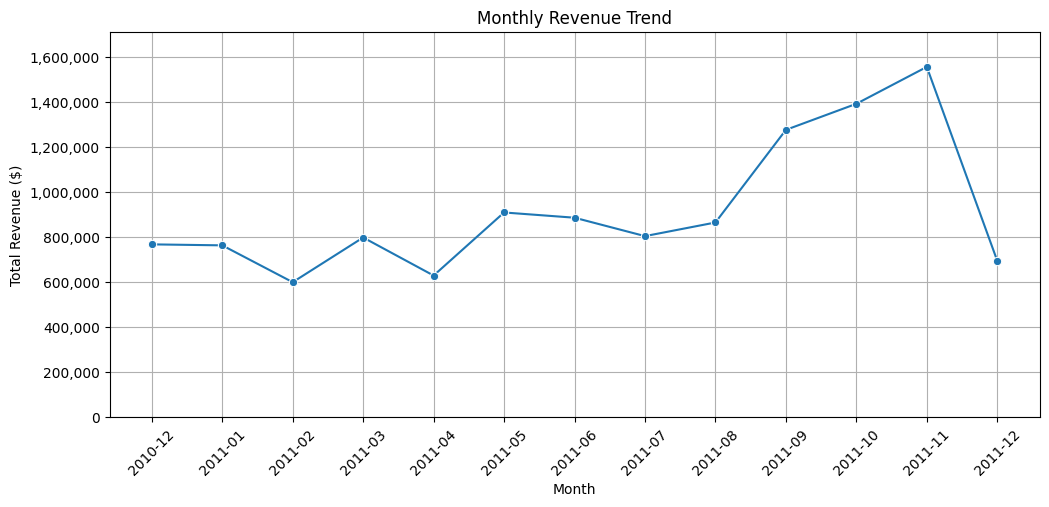

In [332]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylim(0, monthly_revenue.max() * 1.1)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Month")
plt.grid(True) 
plt.savefig("./Data/1. monthly_revenue_plot.png", dpi=300, bbox_inches='tight')

In [333]:
# 2. yearly revenue
yearly_revenue = df_clean.groupby('Year')['Revenue'].sum().sort_index()
yearly_revenue.head()

Year
2010    7.674366e+05
2011    1.117385e+07
Name: Revenue, dtype: float64

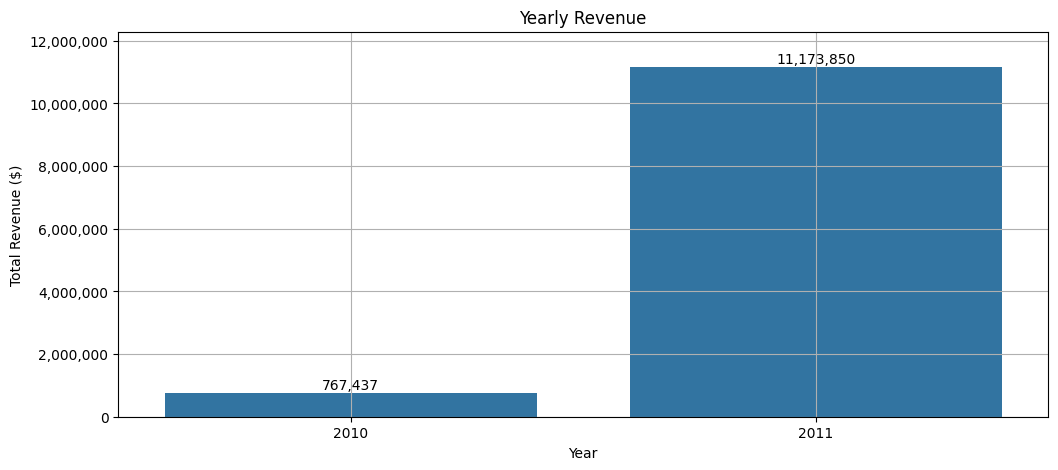

In [334]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
for i, value in enumerate(yearly_revenue.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Yearly Revenue")
plt.ylim(0, yearly_revenue.max() * 1.1)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Year")
plt.grid(True) 
plt.savefig("./Data/2. yearly_revenue_plot.png", dpi=300, bbox_inches='tight')

In [335]:
# 3. Top 10 Country by revenue
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
country_revenue

Country
United Kingdom    9.793245e+06
Netherlands       3.824981e+05
EIRE              3.558315e+05
Germany           3.066820e+05
France            2.800922e+05
Australia         1.856186e+05
Spain             8.251333e+04
Switzerland       7.563489e+04
Belgium           5.520310e+04
Sweden            5.142696e+04
Name: Revenue, dtype: float64

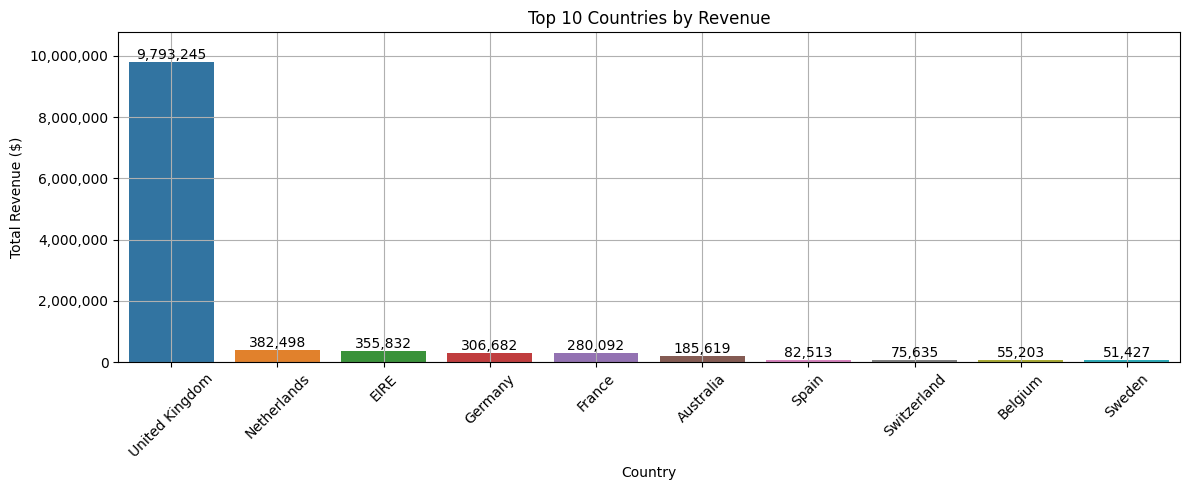

In [336]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=country_revenue.index, y=country_revenue.values, hue=country_revenue.index)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, country_revenue.max() * 1.1)
for i, value in enumerate(country_revenue.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True) 
plt.savefig("./Data/3. top_10_country_by_revenue.png", dpi=300, bbox_inches='tight')

In [337]:
df_clean.groupby(['CustomerID', "Country"])['Revenue'].sum().sort_values(ascending=False).head(10)

CustomerID  Country       
14646.0     Netherlands       375476.0668
18102.0     United Kingdom    347940.7820
17450.0     United Kingdom    260698.0586
16446.0     United Kingdom    225753.1500
14911.0     EIRE              192725.5804
12415.0     Australia         167385.4702
14156.0     EIRE              157288.7042
17511.0     United Kingdom    122023.5892
16029.0     United Kingdom    108573.2856
12346.0     United Kingdom    103426.0240
Name: Revenue, dtype: float64

In [338]:
# 4. Top 10 Purchase
purchase_by_custome = df_clean.groupby(['CustomerID', 'Country'])['Revenue'].sum().sort_values(ascending=False).head(10)
purchase_by_custome = purchase_by_custome.reset_index()
purchase_by_custome

,CustomerID,Country,Revenue
0,14646.0,Netherlands,375476.0668
1,18102.0,United Kingdom,347940.7820
2,17450.0,United Kingdom,260698.0586
3,16446.0,United Kingdom,225753.1500
4,14911.0,EIRE,192725.5804
5,12415.0,Australia,167385.4702
6,14156.0,EIRE,157288.7042
7,17511.0,United Kingdom,122023.5892
8,16029.0,United Kingdom,108573.2856
9,12346.0,United Kingdom,103426.0240


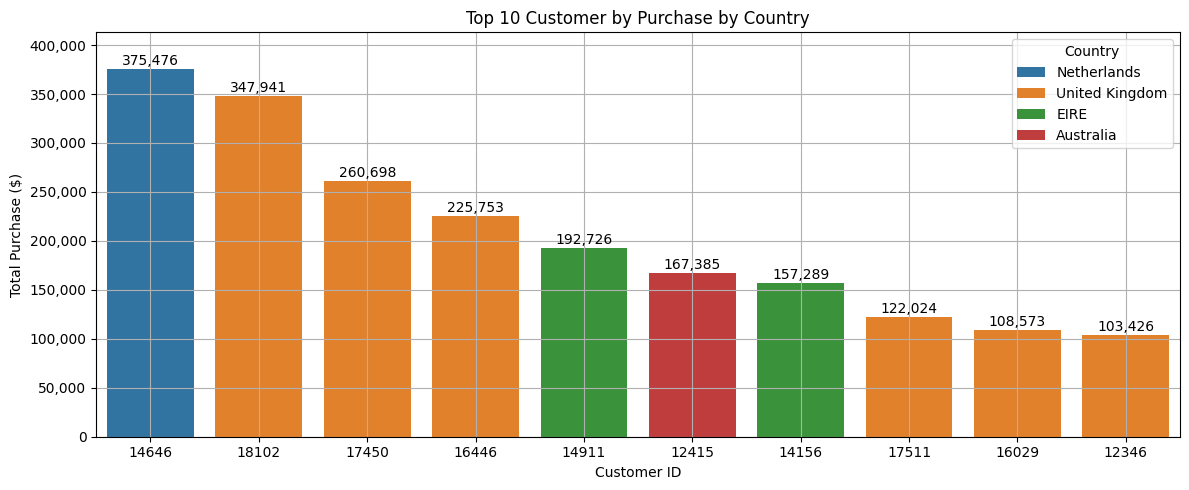

In [339]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x=purchase_by_custome["CustomerID"].astype(int).astype(str), y=purchase_by_custome["Revenue"], hue=purchase_by_custome["Country"])
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, purchase_by_custome["Revenue"].max() * 1.1 )
for i, value in enumerate(purchase_by_custome["Revenue"]):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title("Top 10 Customer by Purchase by Country")
plt.xlabel("Customer ID")
plt.ylabel("Total Purchase ($)")
plt.tight_layout()
plt.grid(True) 
plt.savefig("./Data/4. top_10_customer_by_purchase.png", dpi=300, bbox_inches='tight')

In [340]:
# 5. No. of Customer by Country (Top 10)
customers_by_country = df_clean.groupby("Country")["CustomerID"].count().sort_values(ascending=False).head(10)
customers_by_country

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1462
Australia           1182
Name: CustomerID, dtype: int64

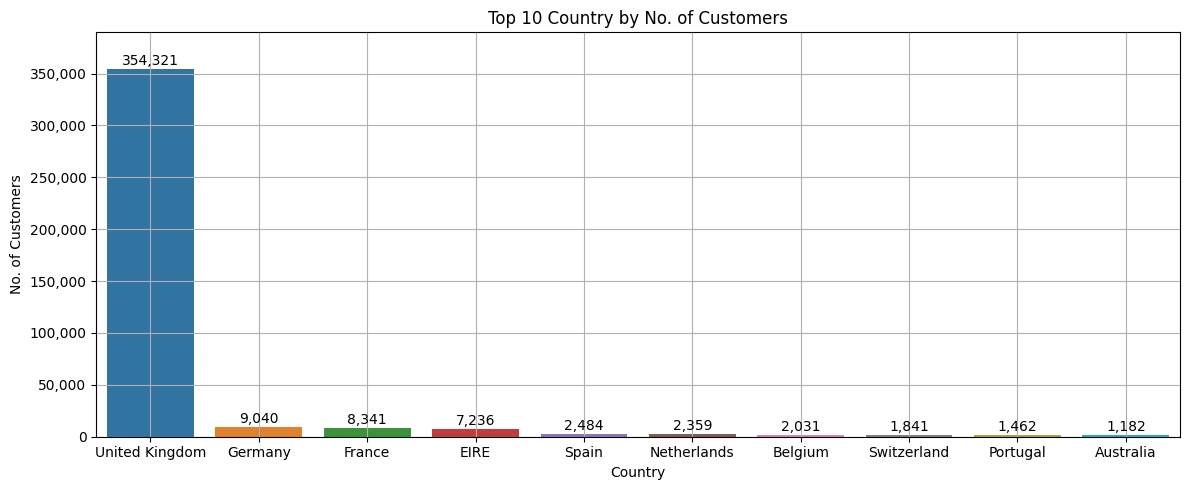

In [341]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x=customers_by_country.index, y=customers_by_country.values, hue=customers_by_country.index)
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(0, customers_by_country.values.max() * 1.1 )
for i, value in enumerate(customers_by_country.values):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)
plt.grid(True)
plt.ylabel("No. of Customers")
plt.xlabel("Country")
plt.title("Top 10 Country by No. of Customers")
plt.tight_layout()
plt.savefig("./Data/5. top_10_country_by_no_of_customers.png", dpi=300, bbox_inches='tight')

In [342]:
# 6. Quantity vs Revenue by Country
df_clean_fil = df_clean[(df_clean["Quantity"] < 5000) & (df_clean["Revenue"] < 10000)]
top_countries = df_clean_fil.groupby("Country")["Revenue"].sum().nlargest(10).index
print(top_countries)
quantity_revenue = df_clean_fil[df_clean_fil["Country"].isin(top_countries)]
quantity_revenue.head(2)

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden'],
      dtype='object', name='Country')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPriceDollar,Revenue,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3.4170,20.5020,2010-12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4.5426,27.2556,2010-12,2010


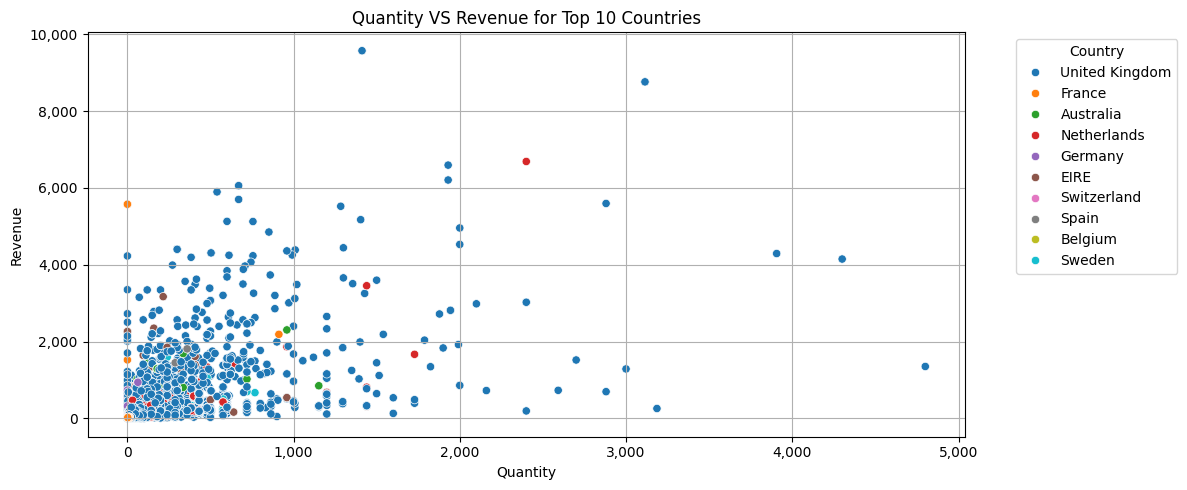

In [343]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(data=quantity_revenue, x="Quantity", y="Revenue", hue="Country")
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.ylabel("Revenue")
plt.xlabel("Quantity")
plt.title("Quantity VS Revenue for Top 10 Countries")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("./Data/6. top_10_country_qunatity_vs_revenue.png", dpi=300, bbox_inches='tight')

In [344]:
print(df_clean["Description"].unique())
print(len(df_clean["Description"].unique()))

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
3877


In [345]:
# 7. Top 10 Products by Quantity Sold
product_quantity = df_clean.groupby("Description")["Quantity"].count().nlargest(10)
product_quantity

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Quantity, dtype: int64

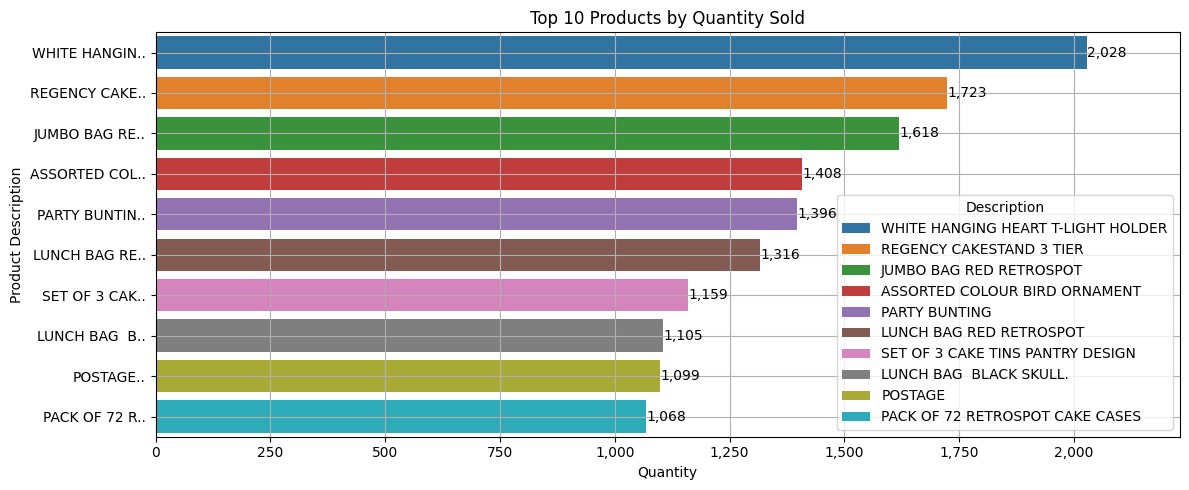

In [346]:
plt.figure(figsize=(12,5))
ax = sns.barplot(y=product_quantity.index.str.slice(0,12) + "..", x=product_quantity.values, hue=product_quantity.index)
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim(0, product_quantity.values.max() * 1.1 )
for i, value in enumerate(product_quantity.values):
    plt.text(value + 1, i, f'{value:,.0f}', ha='left', va='center', fontsize=10)
plt.grid(True)
plt.xlabel("Quantity")
plt.ylabel("Product Description")
plt.title("Top 10 Products by Quantity Sold")
plt.tight_layout()
plt.savefig("./Data/7. top_10_product_by_quantity_sold.png", dpi=300, bbox_inches='tight')

In [347]:
df_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'UnitPriceDollar', 'Revenue',
       'Month', 'Year'],
      dtype='object')

In [348]:
# 8. Correlation Heatmap
corr_df = df_clean[["Quantity", "Revenue", "UnitPrice"]].corr()
corr_df

,Quantity,Revenue,UnitPrice
Quantity,1.000000,0.914387,-0.004563
Revenue,0.914387,1.000000,0.081645
UnitPrice,-0.004563,0.081645,1.000000


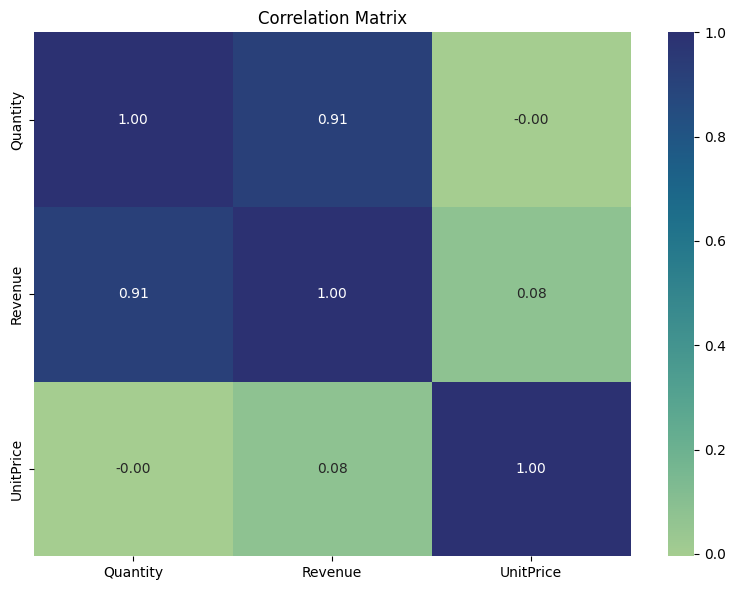

In [349]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="crest")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("./Data/8. correlation_matrix_heatmap.png", dpi=300, bbox_inches='tight')

In [1]:
#https://docs.reportlab.com/reportlab/userguide/ch2_graphics/
from reportlab.pdfgen import canvas
def hello(c):
    c.drawString(100,100,"Hello World")
c = canvas.Canvas("hello.pdf")
hello(c)
c.showPage()
c.save()

In [16]:
# https://www.youtube.com/watch?v=Fxt2T37km9o
from reportlab.lib.enums import TA_JUSTIFY, TA_CENTER
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, TableStyle, Spacer, Image, PageBreak, KeepTogether
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib import colors
from datetime import datetime


In [31]:
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name="FooterStyle", parent=styles["Normal"], alignment=1))
styles.add(ParagraphStyle(name="TitleStyle", parent=styles["Title"], alignment=1))
styles.add(ParagraphStyle(name="InfoStyle", parent=styles["Normal"], alignment=1))
styles.add(ParagraphStyle(name='NormalStyle', parent=styles['BodyText'], alignment=0))
def footer(canvas, doc):
    footer_para = Paragraph("Made with ♥ by Abhishek Tiwari", styles["FooterStyle"])
    w, h = footer_para.wrap(doc.width, doc.bottomMargin)
    footer_para.drawOn(canvas, doc.leftMargin, 10)

In [ ]:
story = []
story.append(Spacer(1, 300))
story.append(Paragraph("Data Analysis Report - Online Retail", styles["TitleStyle"]))
story.append(Spacer(1, 6))
story.append(Paragraph(f"Report Generated by: RetailApp Application", styles["InfoStyle"]))
story.append(Spacer(1, 5))
story.append(Paragraph(f"Date: {datetime.today().strftime('%B %d, %Y')}", styles["InfoStyle"]))
story.append(PageBreak())
doc = SimpleDocTemplate("Test.pdf", pagesize=A4)
doc.build(story, onFirstPage=footer, onLaterPages=footer)

In [4]:
data_columns = {
            "InvoiceNo": "A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation",
            "StockCode": "A 5-digit integral number uniquely assigned to each distinct product",
            "Description": "Product Name",
            "Quantity": "The Quantities of each Product (item) per Transaction",
            "InvoiceDate": "The day and time when each Transaction was generated",
            "UnitPrice": "Product Price per Unit",
            "CustomerID": "A 5-digit integral number uniquely assigned to each Customer",
            "Country": "The name of the country where each Customer resides"
        }

In [6]:
for index, value in data_columns.items():
    print(index,value)

InvoiceNo A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation
StockCode A 5-digit integral number uniquely assigned to each distinct product
Description Product Name
Quantity The Quantities of each Product (item) per Transaction
InvoiceDate The day and time when each Transaction was generated
UnitPrice Product Price per Unit
CustomerID A 5-digit integral number uniquely assigned to each Customer
Country The name of the country where each Customer resides


In [32]:
table_data = [["Column", "Description"]] 
table_data += [[index, Paragraph(value, styles["NormalStyle"])] for index, value in data_columns.items()]
col_width = [100, 400]
table_data

[['Column', 'Description'],
 ['InvoiceNo', Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': "A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation"
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text="A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation", textColor=Color(0,0,0,1), us_lines=[])]
  'style': <ParagraphStyle 'NormalStyle'>
  'bulletText': None
  'debug': 0
  ) #Paragraph],
 ['StockCode',
  Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'A 5-digit integral number uniquely assigned to each distinct product'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='A 5-digit integral number uniquely assigned to each distinct product', textColor=Color(0,0,0,1), us_li

In [33]:
table = Table(table_data, colWidths=col_width, hAlign="LEFT")
table.setStyle(
    TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold')
    ])
)
table

Table(
 rowHeights=[None, None, None, None, None, None, None, None, None],
 colWidths=[100, 400],
[['Column', 'Description'],
   ['InvoiceNo',
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': "A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation"
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text="A 6-digit integral number uniquely assigned to each Transaction. If this code starts with letter 'c', it indicates a Cancellation", textColor=Color(0,0,0,1), us_lines=[])]
  'style': <ParagraphStyle 'NormalStyle'>
  'bulletText': None
  'debug': 0
  ) #Paragraph],
   ['StockCode',
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'A 5-digit integral number uniquely assigned to each distinct product'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, 

In [34]:
story = []
story.append(Spacer(1, 300))
story.append(Paragraph("Data Analysis Report - Online Retail", styles["TitleStyle"]))
story.append(Spacer(1, 6))
story.append(Paragraph(f"Report Generated by: RetailApp Application", styles["InfoStyle"]))
story.append(Spacer(1, 5))
story.append(Paragraph(f"Date: {datetime.today().strftime('%B %d, %Y')}", styles["InfoStyle"]))
story.append(Spacer(1, 5))
story.append(table)
story.append(PageBreak())
doc = SimpleDocTemplate("Test_table.pdf", pagesize=A4)
doc.build(story, onFirstPage=footer, onLaterPages=footer)

In [35]:
data_types ={
            "InvoiceNo": ["Categorical","Text"],
            "StockCode": ["Categorical","Text"],
            "Description": ["Categorical","Text"],
            "Quantity": ["Integer","Numeric"],
            "InvoiceDate": ["Date","Datetime"],
            "UnitPrice": ["Continuous","Numeric"],
            "CustomerID": ["Categorical","Numeric"],
            "Country": ["Categorical","Text"]
            }

In [38]:
for index, value in data_types.items():
    print(index, ":", value[1])

InvoiceNo : Text
StockCode : Text
Description : Text
Quantity : Numeric
InvoiceDate : Datetime
UnitPrice : Numeric
CustomerID : Numeric
Country : Text


In [39]:
table_data = [["Column", "Type", "Data Type"]] 
table_data += [[index, Paragraph(value[0], styles["NormalStyle"]), Paragraph(value[1], styles["NormalStyle"])] for index,value in data_types.items()]
table_data

[['Column', 'Type', 'Data Type'],
 ['InvoiceNo', Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Categorical'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Categorical', textColor=Color(0,0,0,1), us_lines=[])]
  'style': <ParagraphStyle 'NormalStyle'>
  'bulletText': None
  'debug': 0
  ) #Paragraph, Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Text'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Text', textColor=Color(0,0,0,1), us_lines=[])]
  'style': <ParagraphStyle 'NormalStyle'>
  'bulletText': None
  'debug': 0
  ) #Paragraph],
 ['StockCode',
  Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Categorical'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Categorical', textColor=Color(0,0,0,1), us_lines=[])]
  's

In [44]:
col_width = [100, 100, 100]
table = Table(table_data, colWidths=col_width, hAlign="LEFT")
table.setStyle(
    TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.lightgrey),
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold')
    ])
)
table

Table(
 rowHeights=[None, None, None, None, None, None, None, None, None],
 colWidths=[100, 100, 100],
[['Column', 'Type', 'Data Type'],
   ['InvoiceNo',
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Categorical'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Categorical', textColor=Color(0,0,0,1), us_lines=[])]
  'style': <ParagraphStyle 'NormalStyle'>
  'bulletText': None
  'debug': 0
  'width': 138
  '_wrapWidths': [138, 138]
  '_width_max': 50.57000000000001
  'height': 12
  '_splitLongWordCount': 0
  '_hyphenations': 0
  'blPara': ParaFrag(__tag__='para', ascent=7.18, bold=0, descent=-2.07, fontName='Helvetica', fontSize=10, greek=0, italic=0, kind=0, lines=[(87.42999999999999, ['Categorical'])], link=[], rise=0, text='Categorical', textColor=Color(0,0,0,1), us_lines=[])
  ) #Paragraph,
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Text'
  'frags': [ParaFrag(__tag

In [45]:
story = []
story.append(Spacer(1, 300))
story.append(Paragraph("Data Analysis Report - Online Retail", styles["TitleStyle"]))
story.append(Spacer(1, 6))
story.append(Paragraph(f"Report Generated by: RetailApp Application", styles["InfoStyle"]))
story.append(Spacer(1, 5))
story.append(Paragraph(f"Date: {datetime.today().strftime('%B %d, %Y')}", styles["InfoStyle"]))
story.append(Spacer(1, 5))
story.append(table)
story.append(PageBreak())
doc = SimpleDocTemplate("Test_table.pdf", pagesize=A4)
doc.build(story, onFirstPage=footer, onLaterPages=footer)

In [48]:
kpis = {
            "Total Transaction": f"{100}",
            "Total Revenue": f"$ {120}",
            "Average Revenue": f"$ {120}",
            "Unique Customers": f"{135}",
        }
for index in kpis.keys():
    print(kpis[index])

100
$ 120
$ 120
135
